In [9]:
import os
import numpy as np
from io import BytesIO
import tempfile

#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
import lsst.afw.fits as afwFits
import lsst.geom
import lsst.alert.packet
afwDisplay.setDefaultBackend('matplotlib')
import matplotlib.ticker as plticker
from astropy.visualization import (ZScaleInterval, SqrtStretch, ImageNormalize)
from astropy.utils.console import ProgressBar

In [2]:
schema = lsst.alert.packet.Schema.from_file('/project/ebellm/sample-avro-alert/schema/2/1/lsst.alert.avsc')

In [13]:
indir = 'hsc-cosmos_alert_packets'
outdir = 'hsc-cosmos_stamp_images'

In [14]:
with open(f'{indir}/test.avro','rb') as f:
    writer_schema, data = schema.retrieve_alerts(f)

In [15]:
len(data)

1000

In [18]:
def make_cutout_images(alert, outdir):
    # writeFits seems to want filenames, not file pointers
    temp = tempfile.NamedTemporaryFile()
    diffCutout = alert['cutoutDifference']['stampData']
    #with open(temp.name,'wb') as f:
    #    f.write(diffCutout)
    #diffExposure = afwImage.ExposureF(temp.name)

    mm = afwFits.MemFileManager(len(alert['cutoutDifference']['stampData']))
    mm.setData(alert['cutoutDifference']['stampData'],len(alert['cutoutDifference']['stampData']))
    diffExposure = afwImage.ExposureF(mm)
    
    
    fig = plt.figure()                                     
    afw_display = afwDisplay.Display()               
    afw_display.scale('linear', 'zscale')            
    #afw_display.setMaskTransparency(90)  
    afw_display.setMaskTransparency(100)  
    afw_display.setMaskPlaneColor('DETECTED','blue') 
    afw_display.mtv(diffExposure)                          
    plt.savefig(f"{outdir}/{alert['diaSource']['diaSourceId']}_diff.png")
    #plt.show() 
    plt.close(fig)

    
    #return diffExposure

In [6]:
#make_cutout_images(data[4])

In [7]:
#!rm -f hits_alert_stamp_images/*

FloatProgress(value=0.0)

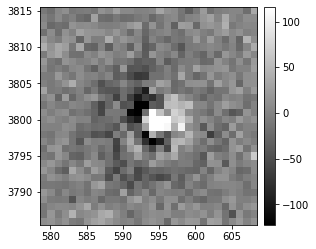

In [19]:
with ProgressBar(len(data), ipython_widget=True) as bar:
    for alert in data:
        make_cutout_images(alert, outdir)
        bar.update()